## Read data

## Импорт модулей и библиотек

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from collections import Counter
import seaborn as sns
from itertools import chain

import os
import string
import re

import gensim
from gensim.models import Word2Vec

from tqdm import tqdm_notebook as tqdm


from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
D:\DS_IT\Anaconda\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _depre

In [2]:
news = pd.read_csv('total_news_without_dupl.csv', sep=';', parse_dates=[0], dayfirst=True) # read data
news.index = pd.to_datetime(news['date'])
news.drop('date', axis=1, inplace=True)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Code Snippet for Top Stopwords Barchart

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Analyzing text statistics

* word frequency analysis,
* sentence length analysis,
* average word length analysis

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

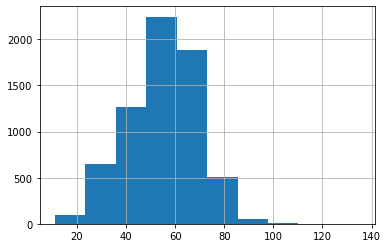

In [4]:
news['title'].str.len().hist()

The histogram shows that news headlines range from 10 to 110 characters and generally, it is between 25 to 85 characters.

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

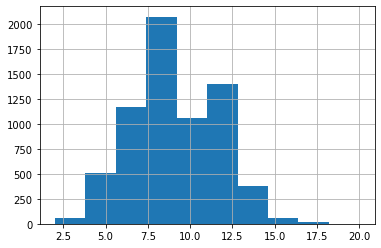

In [5]:
# lot the number of words appearing in each news headline.
news['title'].str.split().\
    map(lambda x: len(x)).\
    hist()

It is clear that the number of words in news headlines ranges from 2 to 18 and mostly falls between 6 to 12 words.

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

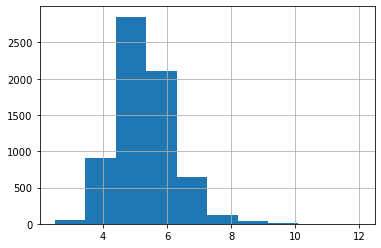

In [6]:
# average word length in each sentence.

news['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

The average word length ranges between 3 to 10 with 5 being the most common length. 

One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data.

plot stop-words

In [7]:
stop=set(nltk.corpus.stopwords.words('english'))

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


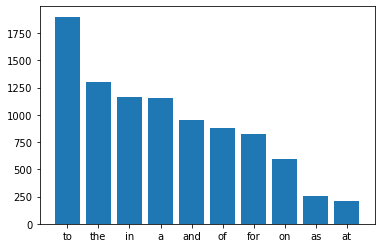

In [8]:
plot_top_stopwords_barchart(news['title'])

We can evidently see that stopwords such as “to”,” the” and “in” dominate in news titles.

Let’s inspect which words other than stopwords occur frequently.

We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.

In [9]:
corpus=[]
new= (news['title']).str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
words = []
for i in corpus:
    if (i.lower() in stop)==False:
        words.append(i)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

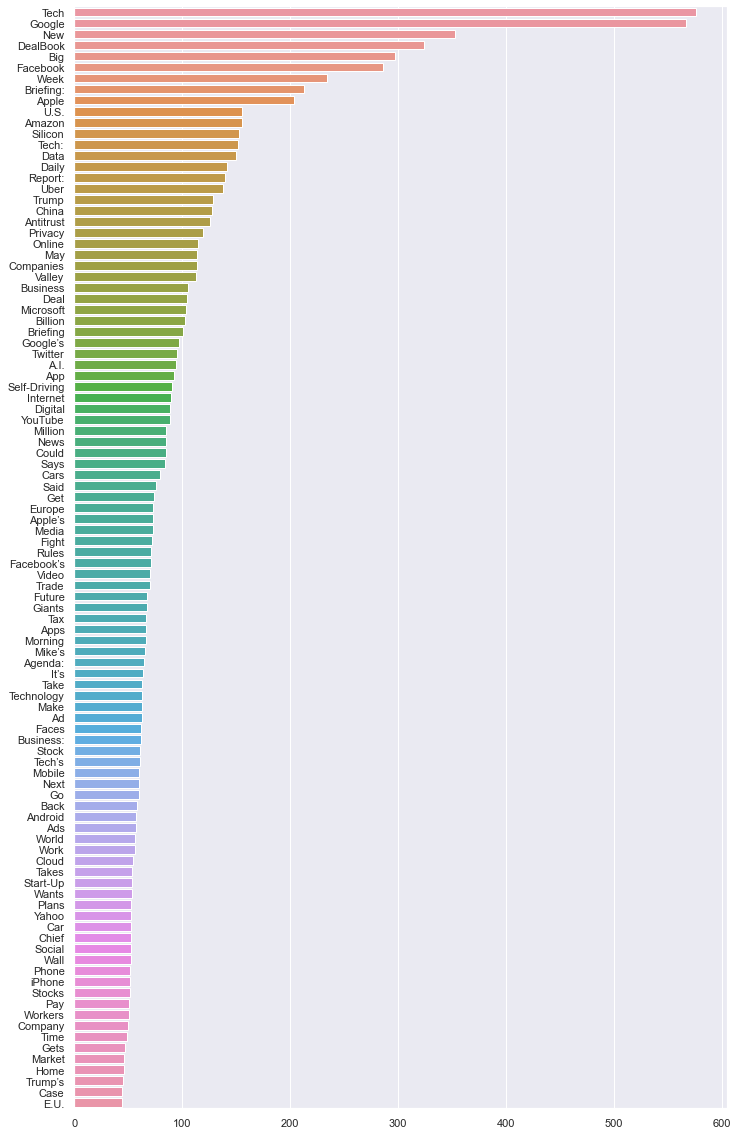

In [11]:
counter=Counter(words)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.set(rc={'figure.figsize':(11.7,20.27)})        
sns.barplot(x=y,y=x)

### Ngram exploration

In [12]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [13]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

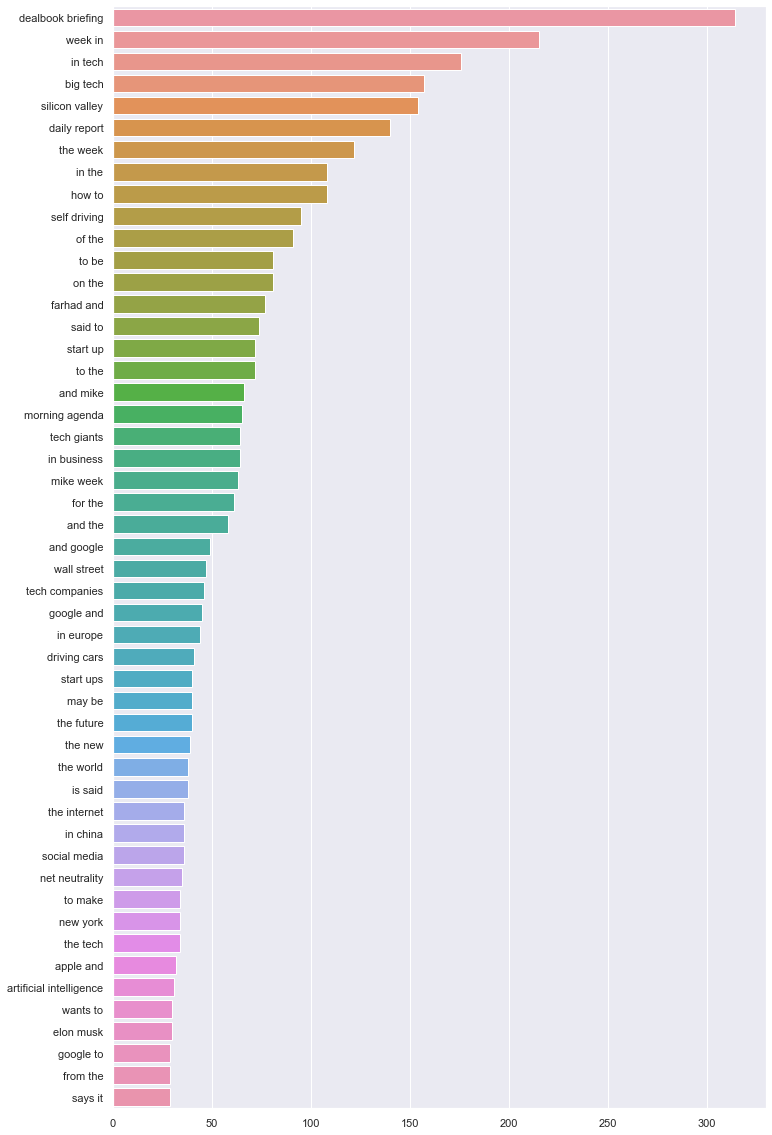

In [14]:
top_n_bigrams=get_top_ngram(news['title'],2)[:50]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

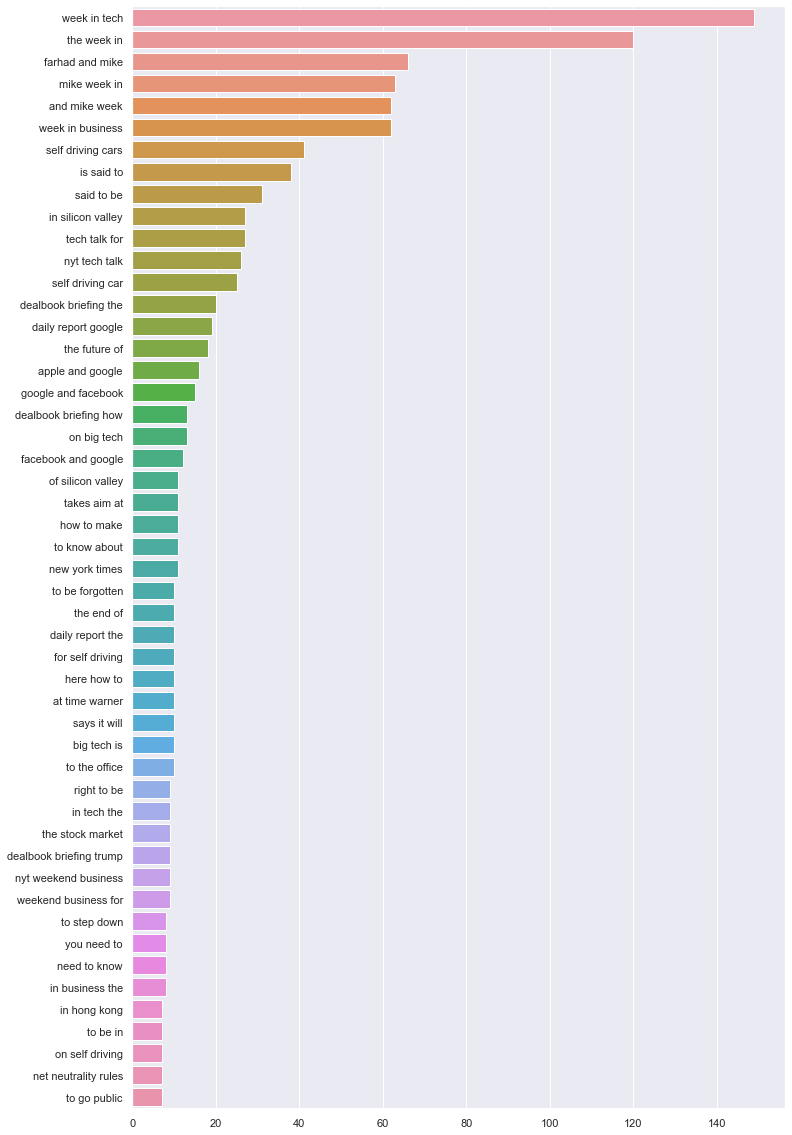

In [15]:
top_tri_grams=get_top_ngram(news['title'],3)[:50]
x,y=map(list,zip(*top_tri_grams)) 
sns.barplot(x=y,y=x)

Каждую пятницу Фархад Манджу и Майк Айзек, технологические репортеры New York Times, просматривают новости недели, предлагая анализ и, возможно, пару шуток о наиболее важных событиях в технологической индустрии.

### Topic modeling exploration with pyLDAvis

Тематическое моделирование - это процесс использования неконтролируемых методов обучения для извлечения основных тем, которые встречаются в коллекции документов.

Скрытое распределение Дирихле (LDA) - это простая в использовании и эффективная модель для тематического моделирования. Каждый документ представлен распределением тем, а каждая тема представлена распределением слов.

После того, как мы классифицируем наши документы по темам, мы можем углубиться в дальнейший анализ данных по каждой теме или группе тем.

Но прежде чем приступить к тематическому моделированию, мы должны немного обработать наши данные. Мы будем:

* токенизация: процесс, посредством которого предложения преобразуются в список токенов или слов.
* удаление стоп-слов
* лемматизация: сводит словоизменительные формы каждого слова к общей основе или корню.
* преобразовать в набор слов: Набор слов - это словарь, в котором ключами являются слова (или нграммы / токены), а значениями - количество раз, когда каждое слово встречается в корпусе.

In [16]:
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['summary']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(news)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
# random_state
lda_model.show_topics()

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.025*"The" + 0.021*"company" + 0.008*"new" + 0.007*"tech" + 0.006*"Google" + 0.006*"business" + 0.006*"technology" + 0.005*"social" + 0.005*"Trump" + 0.005*"medium"'),
 (1,
  '0.017*"The" + 0.016*"company" + 0.014*"Google" + 0.006*"Apple" + 0.006*"could" + 0.005*"Facebook" + 0.005*"tech" + 0.005*"new" + 0.004*"said" + 0.004*"Amazon"'),
 (2,
  '0.014*"The" + 0.007*"tech" + 0.007*"But" + 0.007*"giant" + 0.006*"company" + 0.006*"new" + 0.005*"market" + 0.004*"may" + 0.004*"data" + 0.004*"like"'),
 (3,
  '0.021*"The" + 0.018*"company" + 0.007*"said" + 0.006*"chief" + 0.006*"executive" + 0.006*"tech" + 0.005*"Google" + 0.005*"Facebook" + 0.004*"would" + 0.004*"say"')]

In [19]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
D:\DS_IT\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002740  0.006976       1        1  32.905596
3     -0.061817  0.072898       2        1  23.678547
1     -0.038518 -0.090237       3        1  22.316541
2      0.097595  0.010363       4        1  21.099315, topic_info=          Term        Freq       Total Category  logprob  loglift
738  executive  228.000000  228.000000  Default  30.0000  30.0000
167     Google  650.000000  650.000000  Default  29.0000  29.0000
485      chief  193.000000  193.000000  Default  28.0000  28.0000
303  President  110.000000  110.000000  Default  27.0000  27.0000
337        But  270.000000  270.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
115        one   45.606456  205.801418   Topic4  -6.0599   0.0491
363        say   46.484263  251.400041   Topic4  -6.0408  -0.1320
366     Amazon   45.733671  235.921189   Topic4  -6.0571  -0.0847
38       Apple   47.545522  318.832687   Topic4  -6.0182  -0.3470
119      would   45.805640  253.928187   Topic4  -6.0555  -0.1567

[352 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4573      3  0.839561      21st
352       3  0.910946     Adobe
607       1  0.924981       All
3463      1  0.206240  Alphabet
3463      2  0.206240  Alphabet
...     ...       ...       ...
119       4  0.181154     would
37        1  0.373180      year
37        2  0.176769      year
37        3  0.222598      year
37        4  0.229145      year

[653 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

С левой стороны площадь каждого круга отражает важность темы по отношению к корпусу. Поскольку есть четыре темы, у нас есть четыре круга.
Расстояние между центрами кругов указывает на сходство между темами.
В правой части гистограммы каждой темы показаны 30 самых релевантных слов. 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
X = vect.fit_transform(news.title)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def topic_prediction(my_document):
    string_input = [my_document]
    X = vect.transform(string_input)
    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    output = list(lda_model[corpus])[0]
    topics = sorted(output,key=lambda x:x[1],reverse=True)
    return topics[0][0]
 
topic_prediction(news.title[4])

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2

In [23]:
news['topic'] = news['summary'].apply(lambda x : topic_prediction(x)) 

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Named entity recognition

In [25]:
import spacy 
nlp = spacy.load("en_core_web_sm")

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def ner(text):  
    doc=nlp(text)
    return [X.label_ for X in doc.ents] 

ent=news['summary'].apply(lambda x : ner(x)) 
ent=[x for sub in ent for x in sub] 
counter=Counter(ent) 
count=counter.most_common()

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

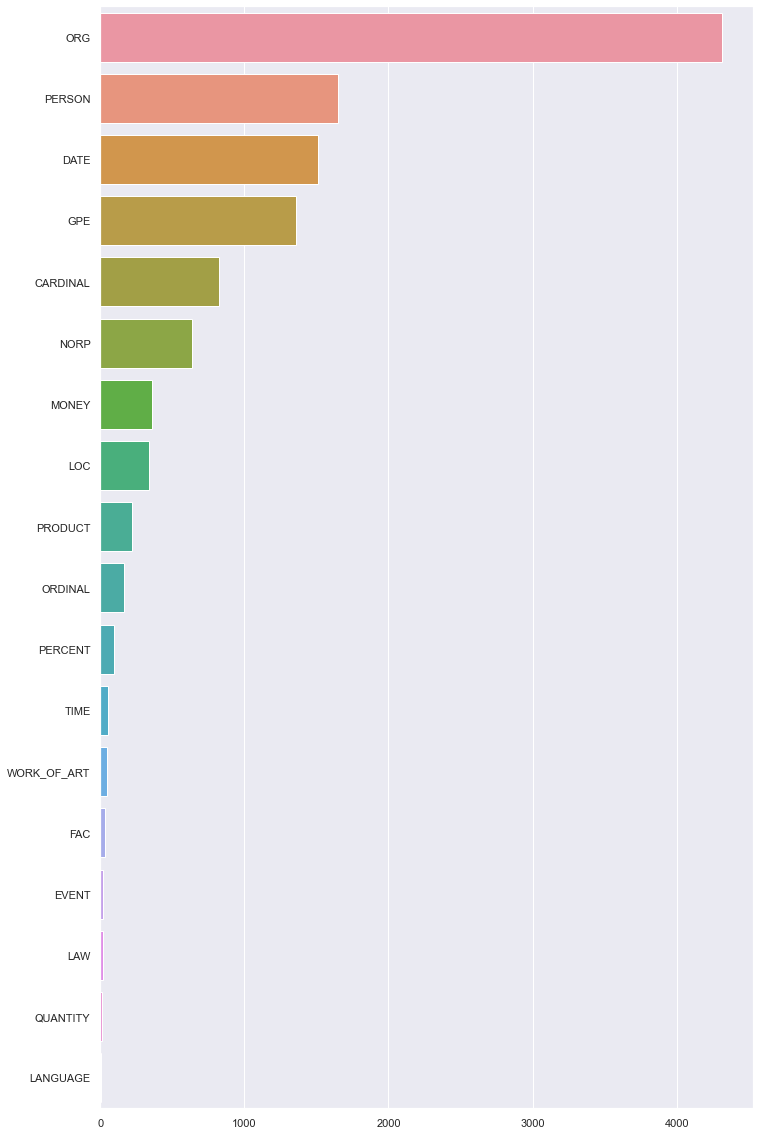

In [27]:
x,y=map(list,zip(*count)) 
sns.barplot(x=y,y=x)

In [28]:
news['entities']=news['summary'].apply(lambda x : ner(x)) 

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sentiment analysis

In [29]:
from textblob import TextBlob

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

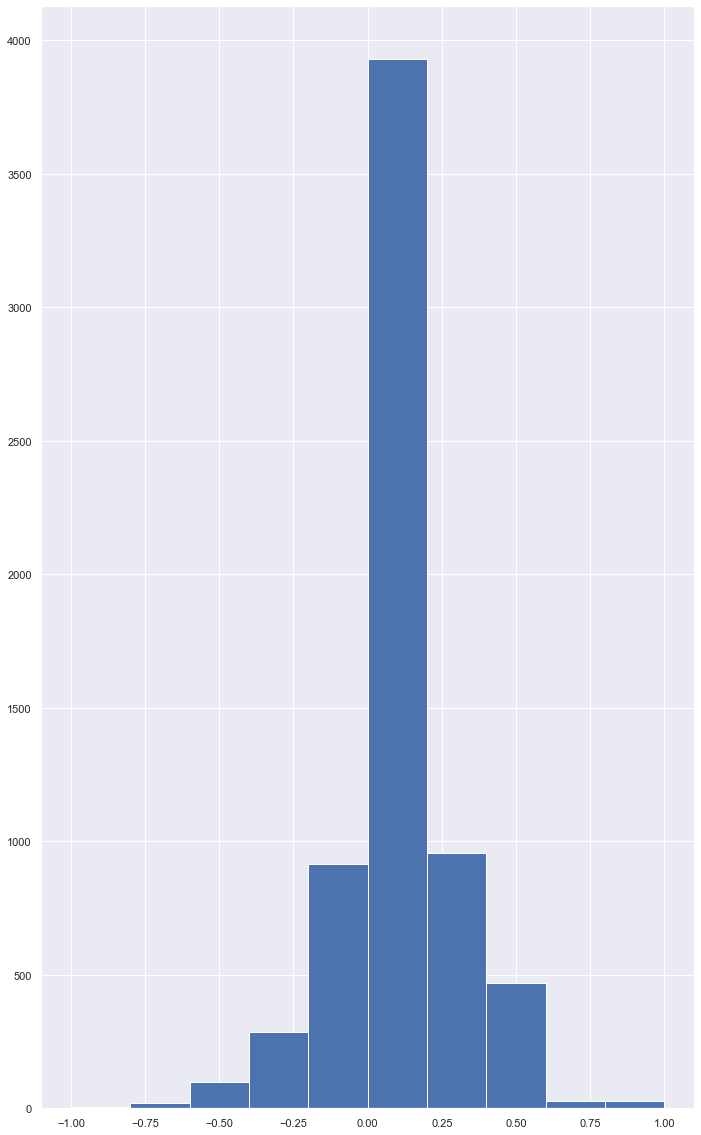

In [30]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
def polarity(text):
    return TextBlob(text).sentiment.polarity 
news['polarity_score']=news['summary'].apply(lambda x : polarity(x))
news['subjectivity_score']=news['summary'].apply(lambda x : subjectivity(x))
news['polarity_score'].hist()

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 3 artists>

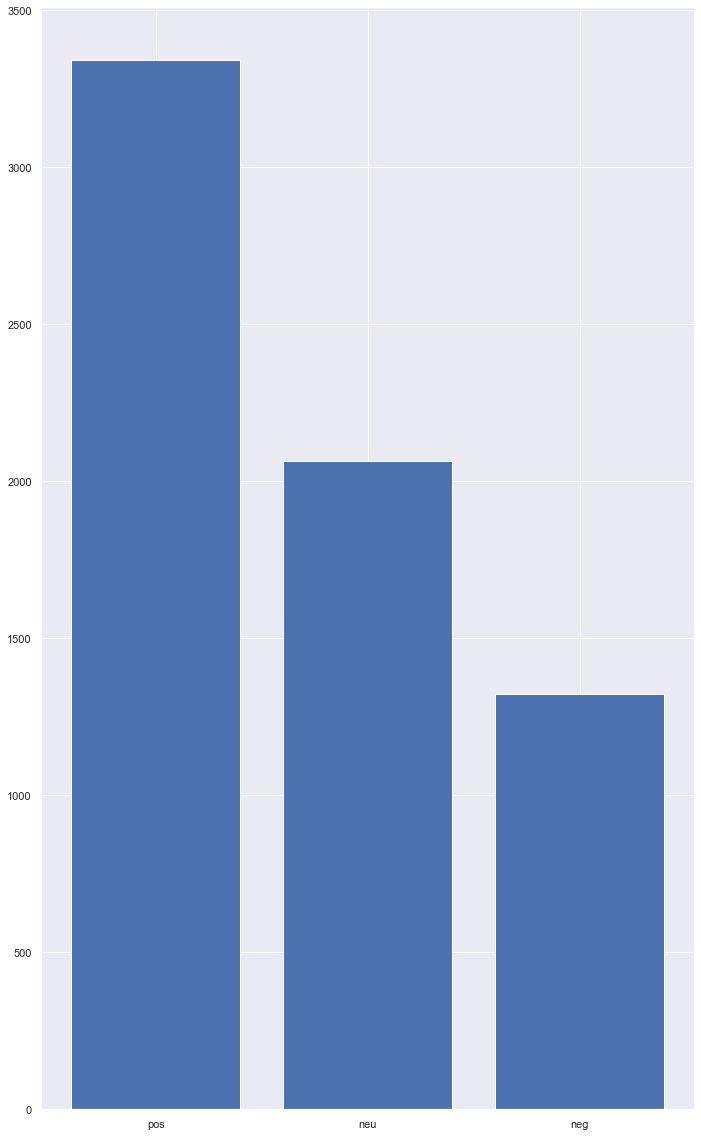

In [31]:
def sentiment(x): 
    if x<0:  
        return'neg'
    elif x==0:  
        return'neu'
    else:  
        return 'pos' 
news['polarity']=news['polarity_score'].map(lambda x: sentiment(x)) 
plt.bar(news.polarity.value_counts().index, news.polarity.value_counts())

## Итого

In [32]:
def get_relevance_col(df):
    rel_flag = []
    for i in range(len(df)):
        if df.entities[i] == [] or (df.polarity_score[i]==0 and df.polarity[i]=='neu'):
            rel_flag.append(0)
        else:
            rel_flag.append(1)
    return rel_flag

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
news['relevance_flag'] = get_relevance_col(news)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
news.to_csv('news_with_eda.csv')

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Датафрейм с результатами кластеризации
pd.read_csv('results_dataframe.csv', index_col=0, parse_dates=[0], dayfirst=True)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,title,summary,relevance_flag
0,31.12.2014,"Standouts in Tech: Drones, Virtual Reality, In...",Farhad Manjoo picks four products from 2014 th...,1
1,01.01.2015,Digital Tax Increase to Take Effect in Europe,New rules are coming into force for services l...,1
2,01.01.2015,Web Freedom Is Seen as a Growing Global Issue,The new year promises further attempts at onli...,1
3,02.01.2015,A Day With Apple Pay,The success of Apple Pay will in part be deter...,1
4,02.01.2015,Daily Report: Web Freedom Is Seen as a Growing...,The new year promises further attempts at onli...,1
...,...,...,...,...
6724,30.08.2022,Google Says Trump’s Truth Social Must Scrub Vi...,The social media app is not available on Googl...,1
6725,31.08.2022,Bed Bath & Beyond Secures a Financial Lifeline,The retailer confirmed that it has taken out m...,1
6726,31.08.2022,Snap Cuts 20% of Employees and Restructures,The maker of Snapchat discontinued some of its...,1
6727,01.09.2022,Tech Companies Slowly Shift Production Away Fr...,Worried about geopolitical tensions and stung ...,1


In [36]:
di = pd.read_csv('results_dataframe.csv', index_col=0, parse_dates=[1], dayfirst=True)
di.index = pd.to_datetime(di['date'])
di.drop('date', axis=1, inplace=True)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
news['actual'] = di['relevance_flag']

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
news = news[(news.relevance_flag == 1) & (news.actual == 1)].drop(['relevance_flag', 'actual'], axis=1)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
news.to_csv('news_correct_date.csv')

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
pd.read_csv('news_correct_date.csv', index_col=0).head(40)

D:\DS_IT\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,summary,topic,entities,polarity_score,subjectivity_score,polarity
date,,,,,,,
2015-01-01,Digital Tax Increase to Take Effect in Europe,New rules are coming into force for services l...,2,['DATE'],0.318182,0.477273,pos
2015-01-01,Web Freedom Is Seen as a Growing Global Issue,The new year promises further attempts at onli...,3,['DATE'],0.068182,0.477273,pos
2015-01-02,A Day With Apple Pay,The success of Apple Pay will in part be deter...,0,"['ORG', 'DATE']",-0.050000,0.350000,neg
2015-01-02,Daily Report: Web Freedom Is Seen as a Growing...,The new year promises further attempts at onli...,3,['DATE'],0.068182,0.477273,pos
2015-01-05,DealBook’s Most Popular Stories of 2014,"Investors fleeing emerging markets, Facebook’s...",0,"['ORG', 'ORG', 'ORG', 'PRODUCT', 'DATE']",0.550000,0.700000,pos
2015-01-05,CES: A Push for Higher Resolution and Better-L...,"The big TV makers, including Samsung and Sony,...",3,"['ORG', 'ORG', 'ORG']",-0.031250,0.368750,neg
2015-01-06,The Year in Market Doublespeak,The last 12 months saw above-average creativit...,3,"['DATE', 'CARDINAL', 'PERSON', 'PERSON', 'ORG'...",0.250000,0.283333,pos
2015-01-07,Morning Agenda: Bond Prices Flash Warning,The bond market may be sounding an economic wa...,0,"['ORG', 'ORG', 'PERSON', 'ORG']",0.200000,0.200000,pos
2015-01-08,Apple’s Cut From App Sales Reached $4.5 Billio...,Google’s app store is the largest in the world...,0,"['ORG', 'LAW']",-0.033333,0.533333,neg
